#### Problem Statement: 
##### Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
##### Perform following steps: 
######  1. Read the dataset. 
###### 2. Distinguish the feature and target set and divide the data set into training and test sets. 
###### 3. Normalize the train and test data. 
###### 4.Initialize and build the model. Identify the points of improvement and implement the same. 
###### 5. Print the accuracy score and confusion matrix 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#deleting unncessory columns
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def visualization(x,y,xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x,y],color=['red','green'],label=['exit','not-exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers",fontsize=20)
    plt.legend()

In [13]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

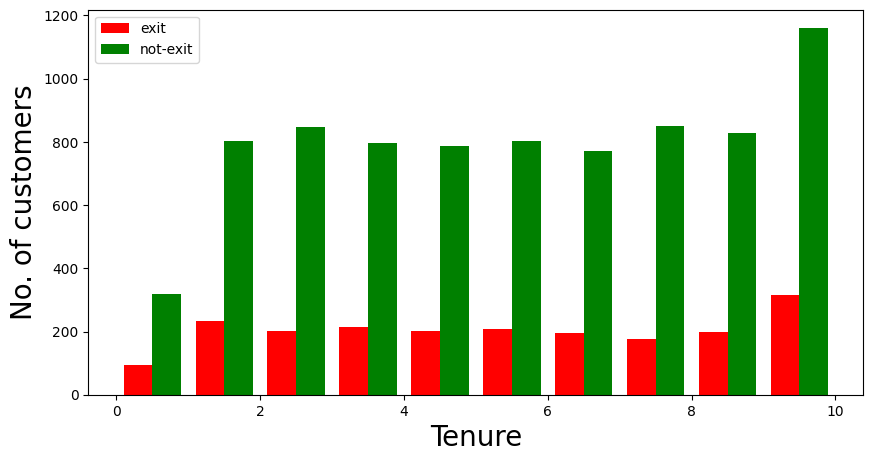

In [14]:
visualization(df_churn_exited,df_churn_not_exited,"Tenure")

In [15]:
df_churn_exited_age = df[df['Exited']==1]['Age']
df_churn_not_exited_age = df[df['Exited']==0]['Age']

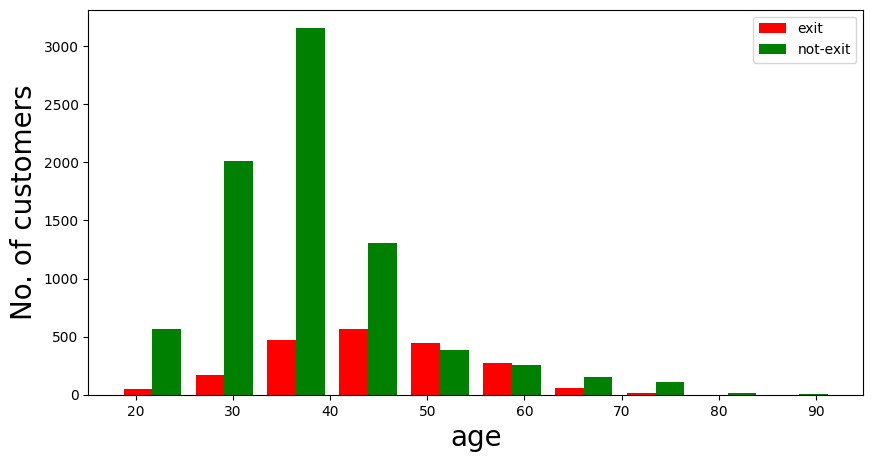

In [16]:
visualization(df_churn_exited_age,df_churn_not_exited_age,"age")

In [17]:
x=df.drop(['Exited'],axis=1)

#here we are performing one hot encoding to convert the categorical data to binary values(0,1)
# get_dummies : perform one-hot encoding
# drop_first = True is use to avoid multicollinearity (drop the first column created)
states = pd.get_dummies(df['Geography'],drop_first=True)
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [18]:
df = pd.concat([df,gender,states],axis=1)

In [19]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [20]:
x = df.drop(['Exited','Geography','Gender'], axis=1)

In [21]:
y = df['Exited']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [24]:
sc = StandardScaler()

In [25]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Model building

In [32]:
# !pip install tensorflow --user


In [33]:
import tensorflow as tf

In [34]:
from tensorflow import keras #keras is used for developing and training deep learning model
from keras.models import Sequential #to create sequential neural network
from keras.layers import Dense #to create hidden layer
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
model = Sequential() #model initialization
model.add(Dense(7,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [38]:
optimizer = tf.keras.optimizers.Adam(0.01)

In [39]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [40]:
model.fit(x_train,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
700/700 [==============================] - 5s 4ms/step - loss: 0.4315 - accuracy: 0.8110
Epoch 2/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3708 - accuracy: 0.8464
Epoch 3/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3624 - accuracy: 0.8514
Epoch 4/100
700/700 [==============================] - 2s 4ms/step - loss: 0.3573 - accuracy: 0.8556
Epoch 5/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3554 - accuracy: 0.8544
Epoch 6/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3524 - accuracy: 0.8554
Epoch 7/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3526 - accuracy: 0.8554
Epoch 8/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3514 - accuracy: 0.8566
Epoch 9/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3482 - accuracy: 0.8583
Epoch 10/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3488 - accura

700/700 [==============================] - 2s 3ms/step - loss: 0.3318 - accuracy: 0.8649
Epoch 82/100
700/700 [==============================] - 2s 4ms/step - loss: 0.3331 - accuracy: 0.8646
Epoch 83/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3338 - accuracy: 0.8641
Epoch 84/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3346 - accuracy: 0.8670
Epoch 85/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3331 - accuracy: 0.8667
Epoch 86/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3343 - accuracy: 0.8650
Epoch 87/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3321 - accuracy: 0.8659
Epoch 88/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3332 - accuracy: 0.8680
Epoch 89/100
700/700 [==============================] - 2s 4ms/step - loss: 0.3330 - accuracy: 0.8641
Epoch 90/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3346 - accuracy: 

In [41]:
y_pred = model.predict(x_test)

94/94 [==============================] - 1s 3ms/step


In [42]:
y_pred[y_pred>0.5]=1
y_pred[y_pred<0.5]=0

In [43]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2317,  110],
       [ 285,  288]], dtype=int64)

In [44]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8683333333333333